In [1]:
import ROOT
import copy

# Open the ROOT file
file = ROOT.TFile("../data/ex_B1_nSidis_5032.root", "READ")
if not file.IsOpen():
    print("Error: Failed to open the file. Please run 'ex_B1_clas12root.C' first")
    exit(1)

# Get the TTree
tree = file.Get("events")

Welcome to JupyROOT 6.22/06


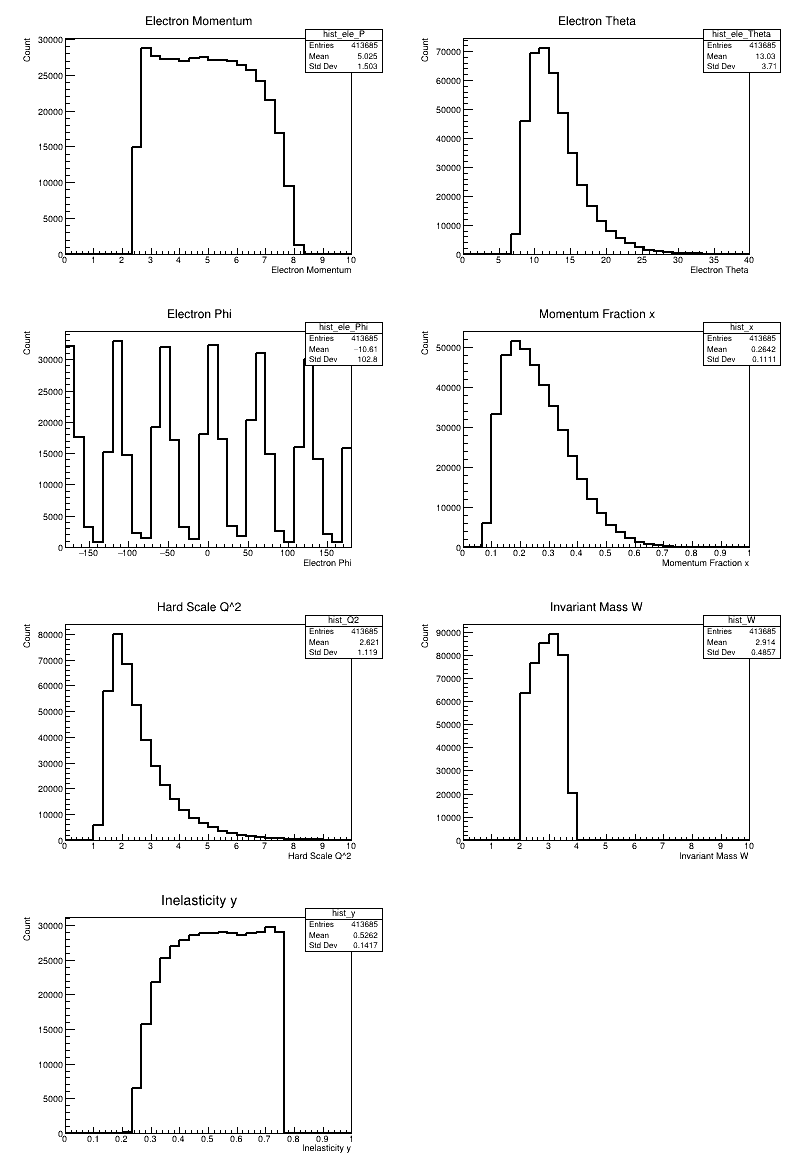

In [2]:
# Set left margin for all figures
ROOT.gStyle.SetPadLeftMargin(0.15)

# Create a TCanvas
canvas = ROOT.TCanvas("canvas", "Histograms", 800, 1200)
canvas.Divide(2,4)  # Adjust the number of rows and columns as needed

# Create TH1F histograms
hist_ele_P = ROOT.TH1F("hist_ele_P", "Electron Momentum", 30, 0, 10)
hist_ele_Theta = ROOT.TH1F("hist_ele_Theta", "Electron Theta", 30, 0, 40)
hist_ele_Phi = ROOT.TH1F("hist_ele_Phi", "Electron Phi", 30, -180, 180)
hist_x = ROOT.TH1F("hist_x", "Momentum Fraction x", 30, 0, 1)
hist_Q2 = ROOT.TH1F("hist_Q2", "Hard Scale Q^2", 30, 0, 10)
hist_W = ROOT.TH1F("hist_W", "Invariant Mass W", 30, 0, 10)
hist_y = ROOT.TH1F("hist_y", "Inelasticity y", 30, 0, 1)

# Set histogram line width and color
hist_ele_P.SetLineWidth(2)
hist_ele_P.SetLineColor(ROOT.kBlack)
hist_ele_Theta.SetLineWidth(2)
hist_ele_Theta.SetLineColor(ROOT.kBlack)
hist_ele_Phi.SetLineWidth(2)
hist_ele_Phi.SetLineColor(ROOT.kBlack)
hist_x.SetLineWidth(2)
hist_x.SetLineColor(ROOT.kBlack)
hist_Q2.SetLineWidth(2)
hist_Q2.SetLineColor(ROOT.kBlack)
hist_W.SetLineWidth(2)
hist_W.SetLineColor(ROOT.kBlack)
hist_y.SetLineWidth(2)
hist_y.SetLineColor(ROOT.kBlack)

# Fill the histograms from the TTree
for event in tree:
    hist_ele_P.Fill(event.ele_P)
    hist_ele_Theta.Fill(event.ele_Theta)
    hist_ele_Phi.Fill(event.ele_Phi)
    hist_x.Fill(event.x)
    hist_Q2.Fill(event.Q2)
    hist_W.Fill(event.W)
    hist_y.Fill(event.y)

# Create a TCanvas grid
canvas.cd(1)
hist_ele_P.Draw()
canvas.cd(2)
hist_ele_Theta.Draw()
canvas.cd(3)
hist_ele_Phi.Draw()
canvas.cd(4)
hist_x.Draw()
canvas.cd(5)
hist_Q2.Draw()
canvas.cd(6)
hist_W.Draw()
canvas.cd(7)
hist_y.Draw()

# Set x and y axis labels
hist_ele_P.GetXaxis().SetTitle("Electron Momentum")
hist_ele_P.GetYaxis().SetTitle("Count")
hist_ele_Theta.GetXaxis().SetTitle("Electron Theta")
hist_ele_Theta.GetYaxis().SetTitle("Count")
hist_ele_Phi.GetXaxis().SetTitle("Electron Phi")
hist_ele_Phi.GetYaxis().SetTitle("Count")
hist_x.GetXaxis().SetTitle("Momentum Fraction x")
hist_x.GetYaxis().SetTitle("Count")
hist_Q2.GetXaxis().SetTitle("Hard Scale Q^2")
hist_Q2.GetYaxis().SetTitle("Count")
hist_W.GetXaxis().SetTitle("Invariant Mass W")
hist_W.GetYaxis().SetTitle("Count")
hist_y.GetXaxis().SetTitle("Inelasticity y")
hist_y.GetYaxis().SetTitle("Count")

# Show the TCanvas
canvas.Update()
canvas.Draw()

In [3]:
import ROOT

def plot_xQ2_distribution_with_bins(tree, bins):
    # Create a TCanvas
    canvas = ROOT.TCanvas("canvas", "x-Q2 Distribution with Bins", 1200, 600)
    canvas.Divide(2, 1)

    canvas.cd(1)
    ROOT.gPad.SetRightMargin(0.15) # Make the z-axis labels easier to see
    
    # Create the x-Q2 distribution histogram
    hist_xQ2 = ROOT.TH2F("hist_xQ2", "x-Q2 Distribution;x;Q^{2} [GeV^{2}]", 100, 0, 1, 100, 0, 10)
    tree.Draw("Q2:x>>hist_xQ2", "", "colz")

    # Draw TLines marking the bin edges on the x-Q2 distribution
    lines = []
    # Add TLatex annotation inside each bin region
    latex = ROOT.TLatex()
    latex.SetTextSize(0.05)
    latex.SetTextAlign(22)
    latex.SetTextColor(6)
    for ibin, bin_def in enumerate(bins):
        xmin, xmax, Q2min, Q2max = bin_def
        line_left = ROOT.TLine(xmin, Q2min, xmin, Q2max)
        line_right = ROOT.TLine(xmax, Q2min, xmax, Q2max)
        line_top = ROOT.TLine(xmin, Q2max, xmax, Q2max)
        line_bottom = ROOT.TLine(xmin, Q2min, xmax, Q2min)
        line_left.SetLineWidth(2)
        line_right.SetLineWidth(2)
        line_top.SetLineWidth(2)
        line_bottom.SetLineWidth(2)
        line_left.SetLineStyle(1)
        line_right.SetLineStyle(1)
        line_top.SetLineStyle(1)
        line_bottom.SetLineStyle(1)
        line_left.Draw("same")
        line_right.Draw("same")
        line_top.Draw("same")
        line_bottom.Draw("same")
        lines.extend([line_left, line_right, line_top, line_bottom])
        x_center = (xmin + xmax) / 2
        y_center = (Q2min + Q2max) / 2
        latex.DrawLatex(x_center, y_center, f"{ibin+1}")
        
    # Create a TLegend for the bin markers
    legend_bins = ROOT.TLegend(0.1, 0.85, 0.9, 0.98)
    legend_bins.SetFillColor(19) # Light gray
    legend_bins.SetNColumns(4)

    # Create a marker style and color list for the bins
    marker_styles = [20, 21, 22, 23]
    marker_colors = [ROOT.kRed, ROOT.kBlue, ROOT.kGreen, ROOT.kOrange, ROOT.kBlack, ROOT.kMagenta, ROOT.kGray]

    # Plot the electron momentum for each bin
    canvas.cd(2)
    ROOT.gStyle.SetOptStat(0) # Remove stats 
    ROOT.gPad.SetLeftMargin(0.1)
    ROOT.gPad.SetTopMargin(0.15)
    hists = []
    for i, bin_def in enumerate(bins):
        xmin, xmax, Q2min, Q2max = bin_def

        # Create the electron momentum histogram for the bin
        hists.append(ROOT.TH1F(f"hist_ele_P_{i}", ";Electron Momentum [GeV]", 100, 0, 10))
        
        tree.Draw(f"ele_P>>hist_ele_P_{i}", f"x>{xmin} && x<{xmax} && Q2>{Q2min} && Q2<{Q2max}","goff")

        # Set the marker style and color for the bin
        hists[-1].SetMarkerStyle(marker_styles[i % len(marker_styles)])
        hists[-1].SetMarkerColor(marker_colors[i % len(marker_colors)])

        # Add an entry to the legend for the bin
        legend_bins.AddEntry(hists[-1], f"Bin {i+1}", "pE")

        # Draw the electron momentum histogram
        hists[-1].Draw("E1 same")

    
    legend_bins.Draw("same")

    
    return copy.deepcopy(canvas)

In [4]:
# Usage example
file = ROOT.TFile("../data/ex_B1_nSidis_5032.root", "READ")
tree = file.Get("events")

# Define the rectangular bins: (xmin, xmax, Q2min, Q2max)
bins = [
    (0.1, 0.2, 1.0, 3.0),
    (0.2, 0.3, 1.0, 2.5),
    (0.2, 0.3, 2.5, 4.5),
    (0.3, 0.5, 1.0, 3.5),
    (0.3, 0.8, 3.5, 10)
]

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


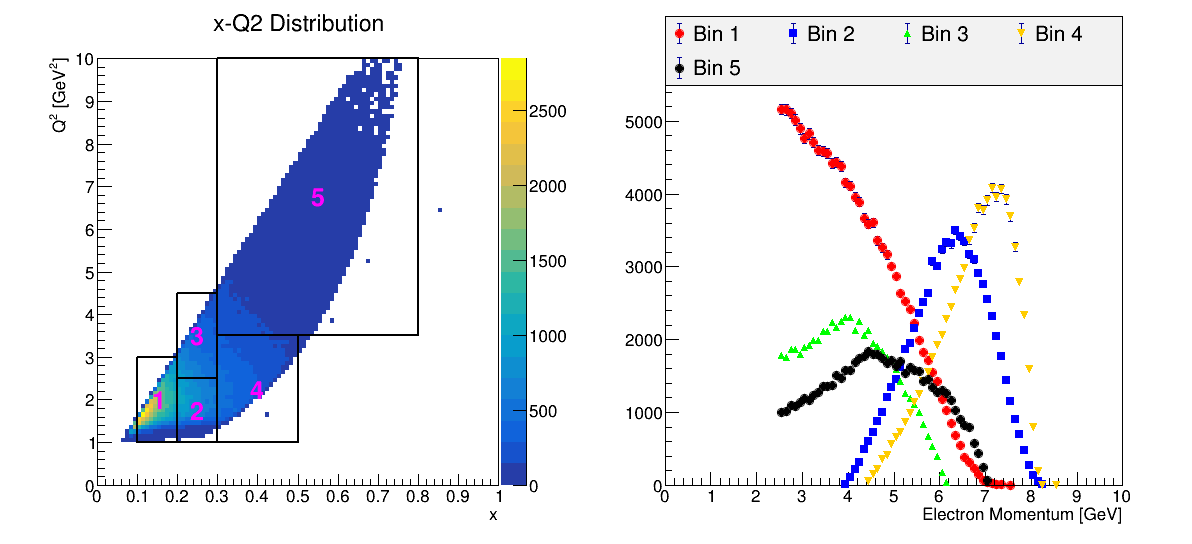

In [5]:
# Call the function to plot the x-Q2 distribution with the bins
canvas=plot_xQ2_distribution_with_bins(tree, bins)
canvas.Draw()